Student name: Harshit Saxena

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
#Check unique values of Pregnanices columnn to see if numercial or not
#data['Pregnancies'].unique() 
#In case values given as Y, N in the column - reassign 0, 1
#Pregnancies_mapping = {'Y': 0, 'N': 1}

#Use a for loop to update values in the 'Pregnancies' column
#for index, row in df.iterrows():
#    df.at[index, 'Pregnancies'] = Pregnancies_mapping.get(row['Pregnancies'], -1)

#Convert column type to int from object
#df['Pregnancies'] = df['Pregnancies'].astype(int)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

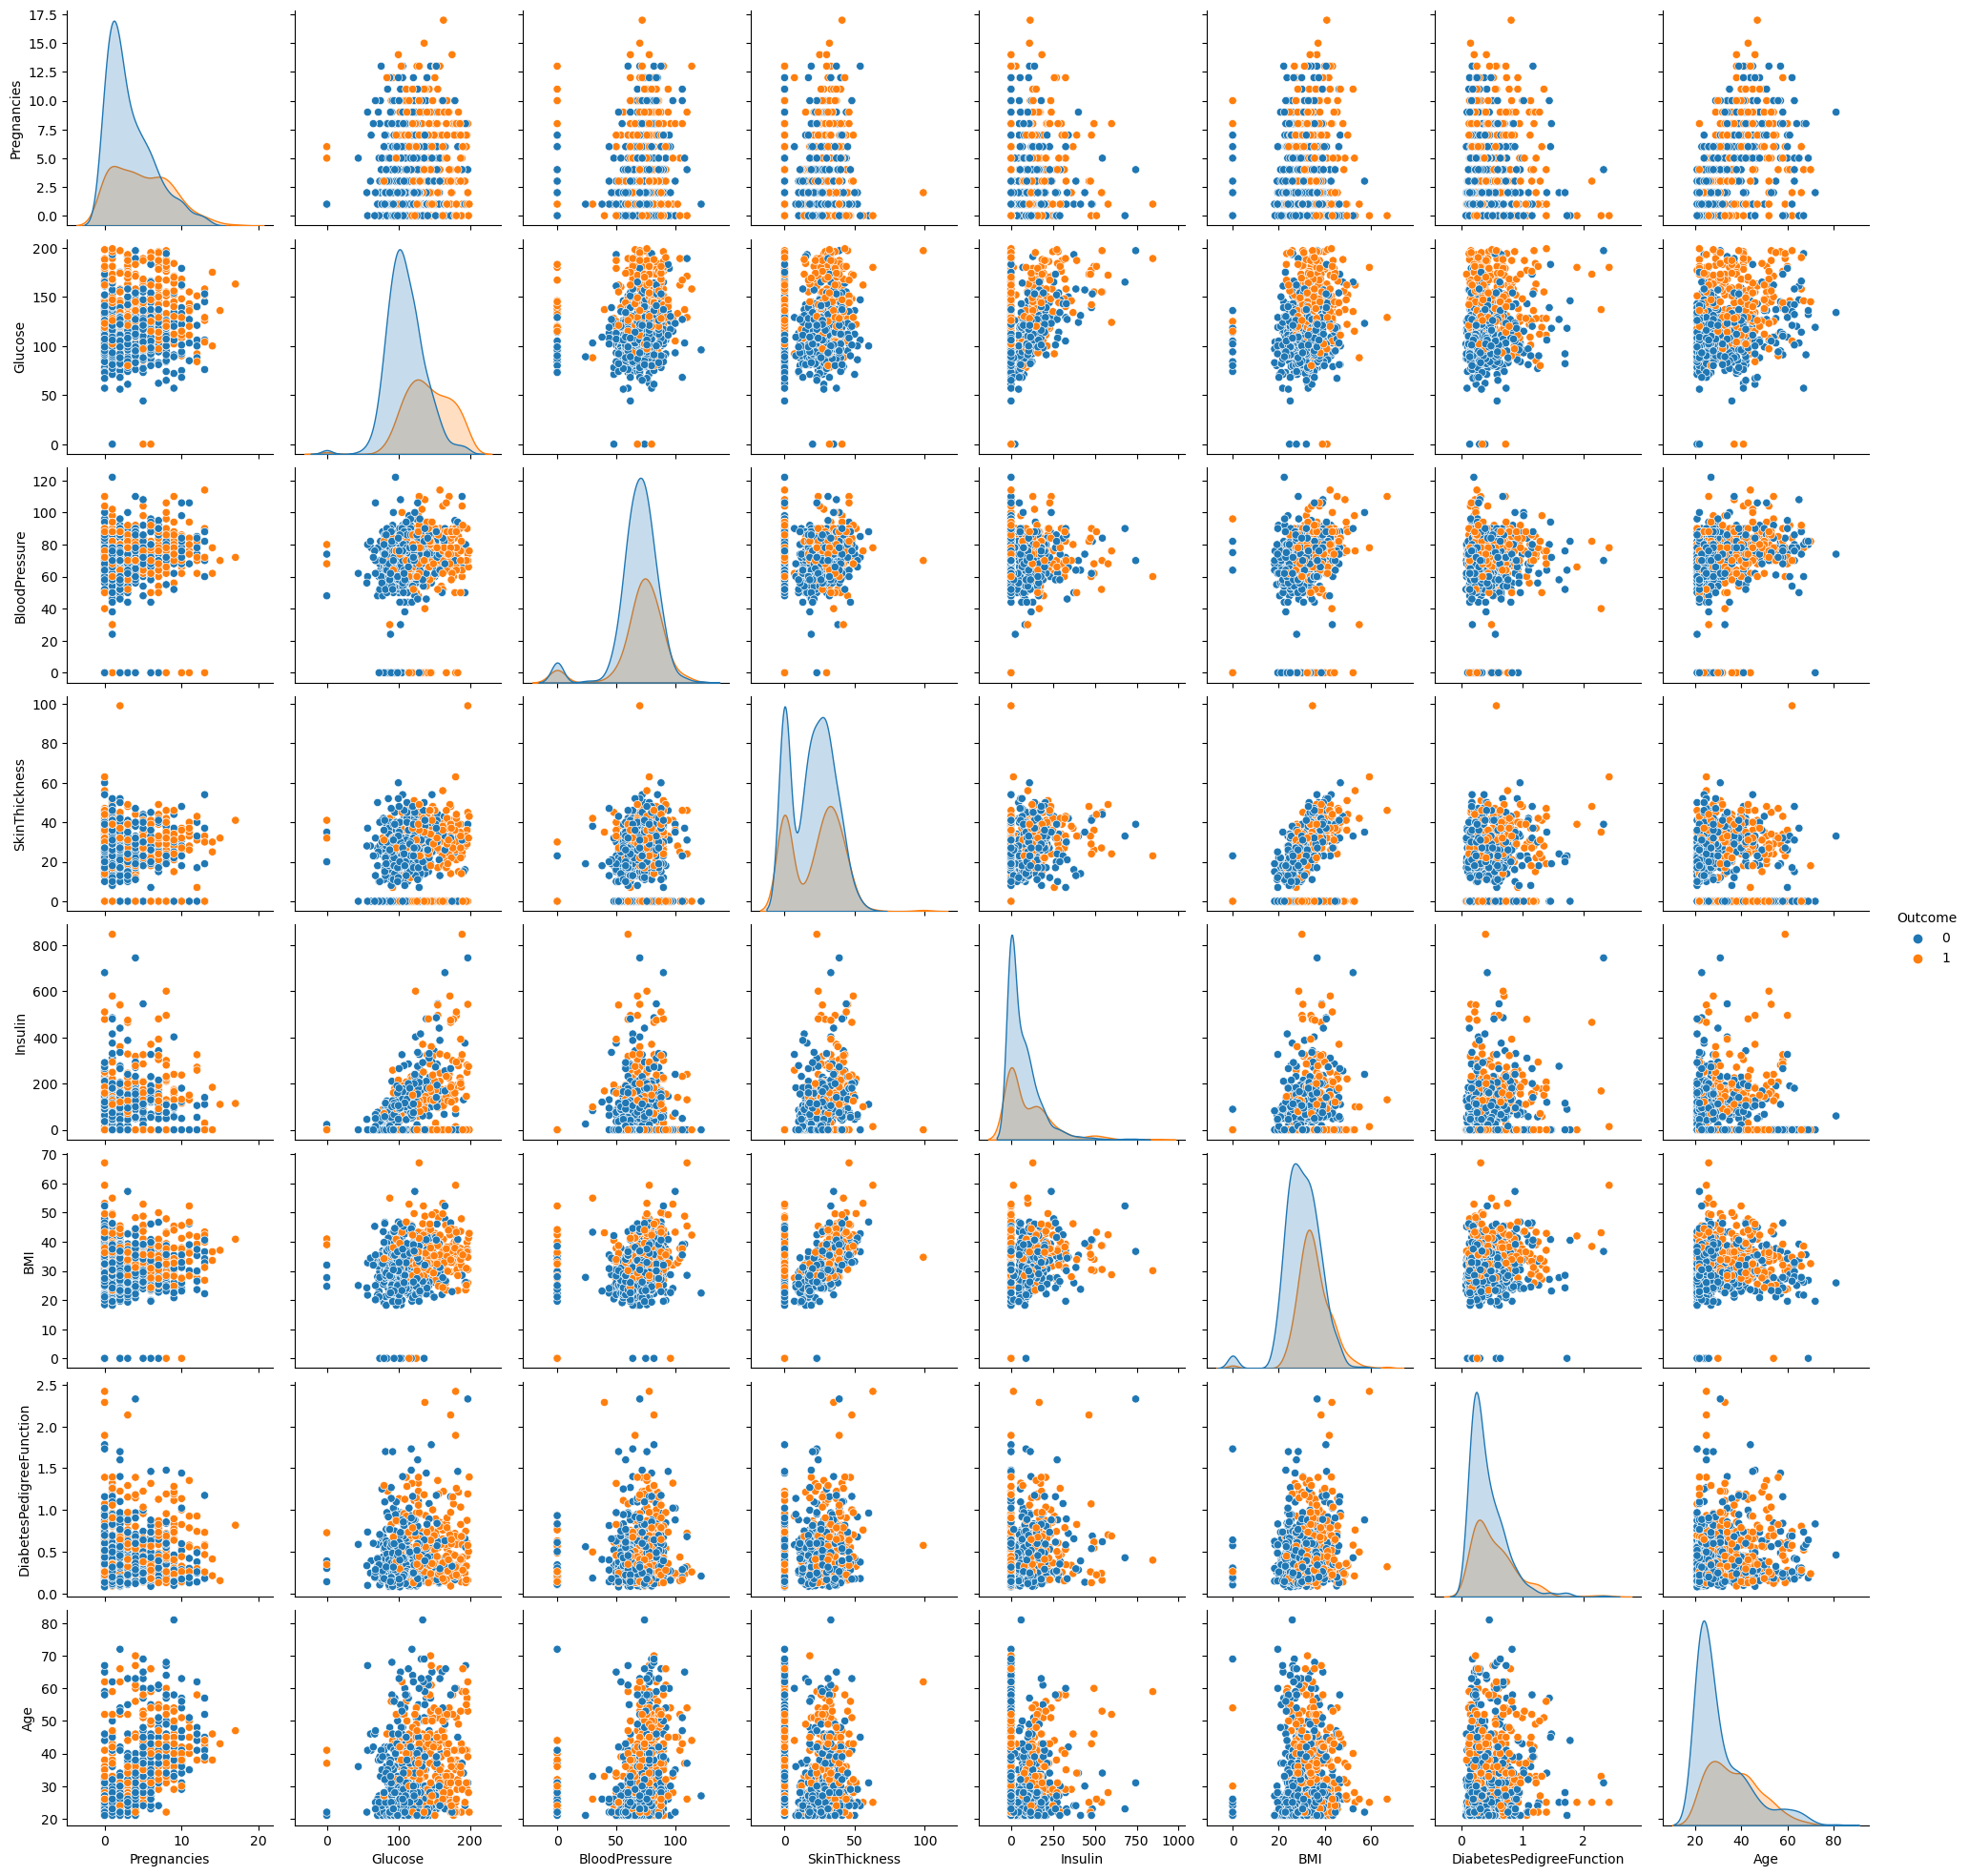

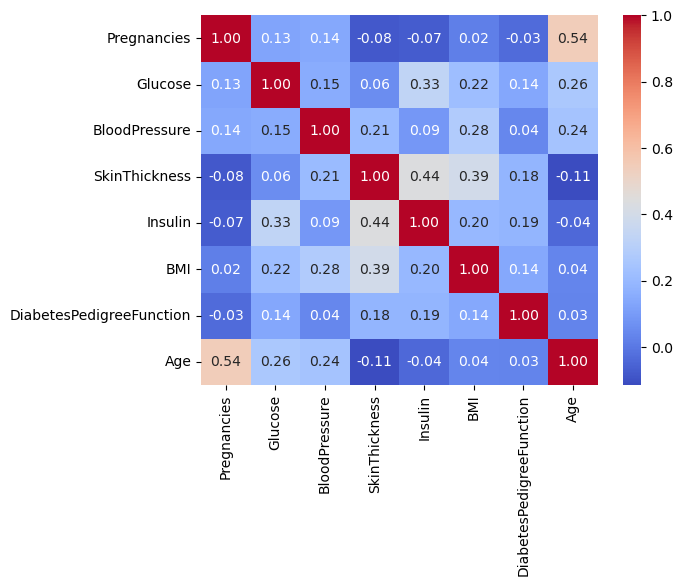

In [8]:
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_test_scaled = (X_test - X_train.mean()) / X_train.std()

X_train_scaled.insert(0, "Bias", 1)
X_test_scaled.insert(0, "Bias", 1)

theta = np.zeros(X_train_scaled.shape[1])

def logistic_regression(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

learning_rate = 0.01
iterations = 1000
theta = logistic_regression(X_train_scaled.values, y_train.values, theta, learning_rate, iterations)

predictions = sigmoid(np.dot(X_test_scaled.values, theta))

threshold = 0.5
predicted_classes = (predictions >= threshold).astype(int)

accuracy = np.mean(predicted_classes == y_test.values)
print(f"Accuracy: {round(accuracy*100,2)}%")

Accuracy: 77.92%


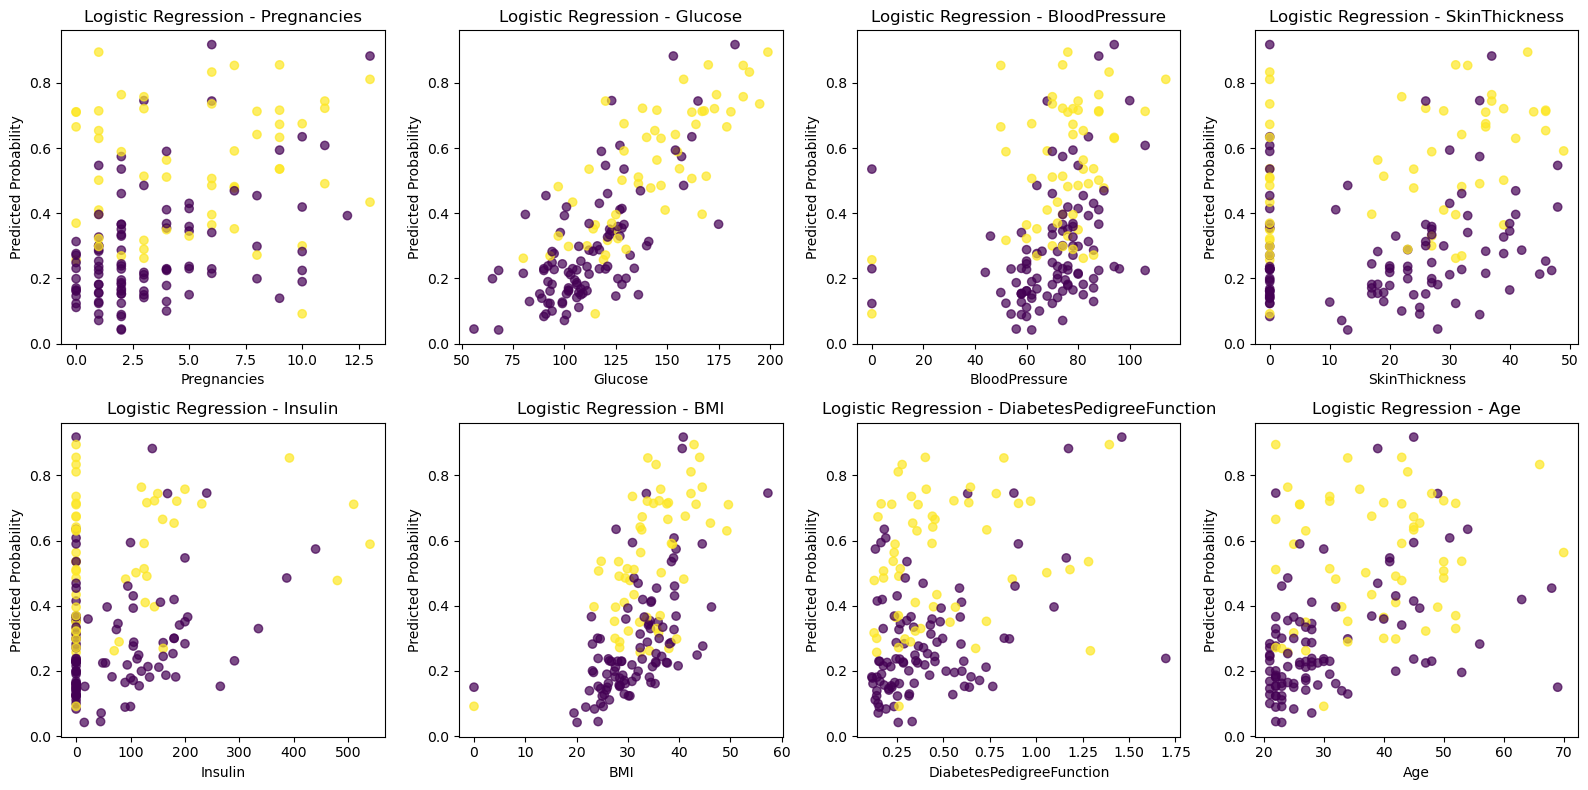

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, feature in enumerate(X.columns):
    ax = axes[i // 4, i % 4]
    ax.scatter(X_test[feature], predictions, c=y_test.values, cmap='viridis', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Predicted Probability')
    ax.set_title(f'Logistic Regression - {feature}')

plt.tight_layout()
plt.show()

In [11]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_test_scaled = (X_test - X_train.mean()) / X_train.std()

X_train_scaled.insert(0, "Bias", 1)
X_test_scaled.insert(0, "Bias", 1)

#Initializeing weights
theta_regression = np.zeros(X_train_scaled.shape[1])

def linear_regression(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m
        theta -= learning_rate * gradient
    return theta

learning_rate_regression = 0.01
iterations_regression = 1000
theta_regression = linear_regression(X_train_scaled.values, y_train.values, theta_regression, learning_rate_regression, iterations_regression)

predictions_regression = np.dot(X_test_scaled.values, theta_regression)

mse = np.mean((predictions_regression - y_test.values) ** 2)
print(f"Mean Squared Error: {round(mse,3)}")

Mean Squared Error: 0.161


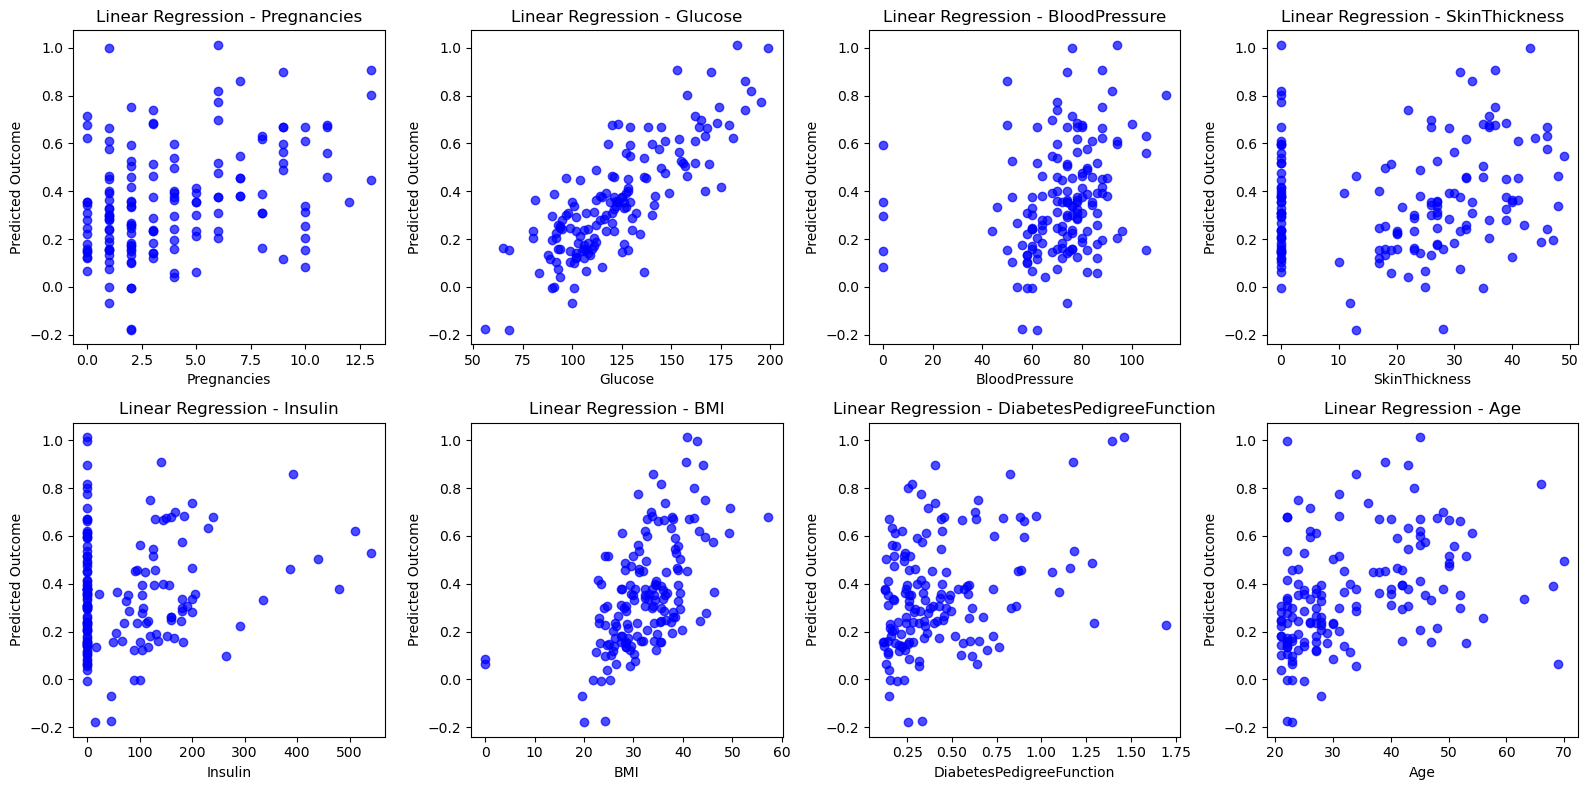

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, feature in enumerate(X.columns):
    ax = axes[i // 4, i % 4]
    ax.scatter(X_test[feature], predictions_regression, c='blue', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Predicted Outcome')
    ax.set_title(f'Linear Regression - {feature}')

plt.tight_layout()
plt.show()


In [13]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def find_nearest_neighbors(X_train, y_train, test_sample, k):
    distances = np.array([euclidean_distance(test_sample, train_sample) for _, train_sample in X_train.iterrows()])
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train.iloc[nearest_indices]
    return nearest_labels

def predict_knn(nearest_labels):
    return np.bincount(nearest_labels).argmax()

def predict_knn_classifier(X_train, y_train, X_test, k):
    predictions = [predict_knn(find_nearest_neighbors(X_train, y_train, X_test.iloc[i], k)) for i in range(len(X_test))]
    return np.array(predictions)

k-NN Accuracy: 72.078%
Visualizing k-NN Classification using features: Glucose, BMI


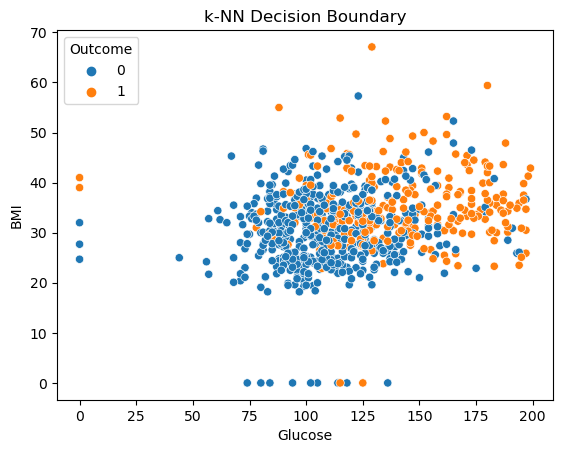

In [14]:
k_neighbors = 7

knn_predictions = predict_knn_classifier(X_train, y_train, X_test, k_neighbors)

accuracy_score_knn = np.mean(knn_predictions == y_test.values)
print(f"k-NN Accuracy: {round(accuracy_score_knn*100,3)}%")

features_for_visualization_knn = ['Glucose', 'BMI']
print(f"Visualizing k-NN Classification using features: {features_for_visualization_knn[0]}, {features_for_visualization_knn[1]}")
sns.scatterplot(x=features_for_visualization_knn[0], y=features_for_visualization_knn[1], hue='Outcome', data=df)
plt.title("k-NN Decision Boundary")
plt.show()

k-NN Accuracy: 72.078%
Visualizing k-NN Classification using features: Pregnancies, Age


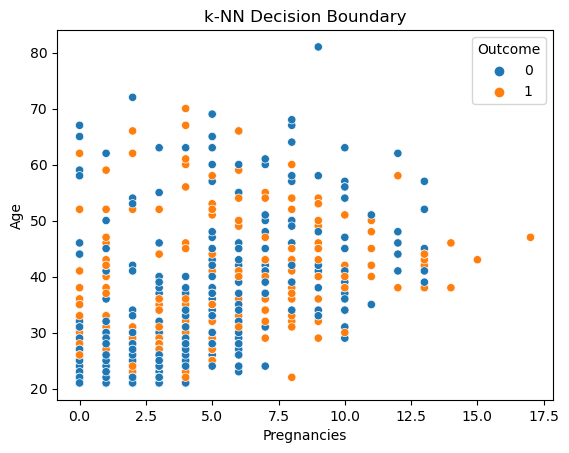

In [15]:
k_neighbors = 7

knn_predictions = predict_knn_classifier(X_train, y_train, X_test, k_neighbors)

accuracy_score_knn = np.mean(knn_predictions == y_test.values)
print(f"k-NN Accuracy: {round(accuracy_score_knn*100,3)}%")

features_for_visualization_knn = ['Pregnancies', 'Age']
print(f"Visualizing k-NN Classification using features: {features_for_visualization_knn[0]}, {features_for_visualization_knn[1]}")
sns.scatterplot(x=features_for_visualization_knn[0], y=features_for_visualization_knn[1], hue='Outcome', data=df)
plt.title("k-NN Decision Boundary")
plt.show()

k-NN Accuracy: 72.078%
Visualizing k-NN Classification using features: SkinThickness, BloodPressure


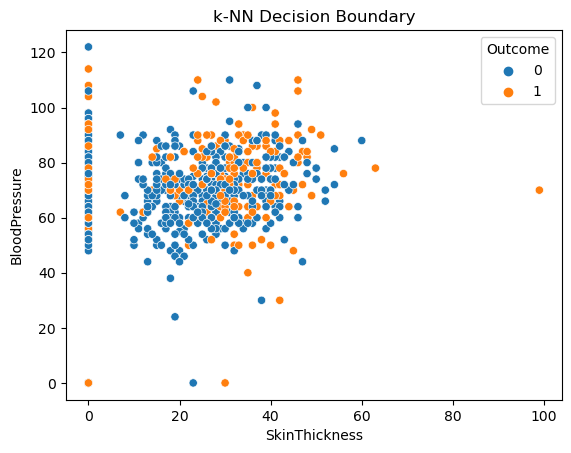

In [16]:
k_neighbors = 7

knn_predictions = predict_knn_classifier(X_train, y_train, X_test, k_neighbors)

accuracy_score_knn = np.mean(knn_predictions == y_test.values)
print(f"k-NN Accuracy: {round(accuracy_score_knn*100,3)}%")

features_for_visualization_knn = ['SkinThickness', 'BloodPressure']
print(f"Visualizing k-NN Classification using features: {features_for_visualization_knn[0]}, {features_for_visualization_knn[1]}")
sns.scatterplot(x=features_for_visualization_knn[0], y=features_for_visualization_knn[1], hue='Outcome', data=df)
plt.title("k-NN Decision Boundary")
plt.show()